#  OpenCV Connected Component Labeling and Analysis

https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

In [6]:
req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/3/32/California_license_plate%2C_August_2012.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv.imdecode(arr,cv.IMREAD_GRAYSCALE) # 'Load it as grayscale'
gray =img.copy()


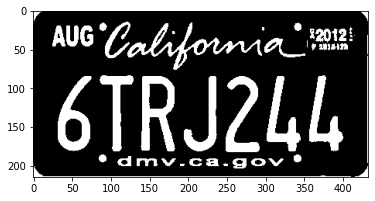

In [23]:
thresh = cv.threshold(gray, 0, 255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
plt.imshow(thresh,cmap="gray")
plt.show()

In [24]:
output = cv.connectedComponentsWithStats( thresh, 8, cv.CV_32S)
(numLabels, labels, stats, centroids) = output
# print(output)

<ipython-input-30-1519b352e88e>:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


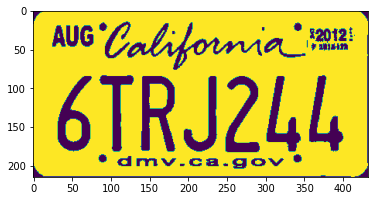

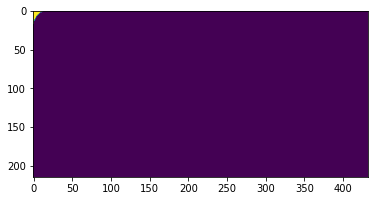

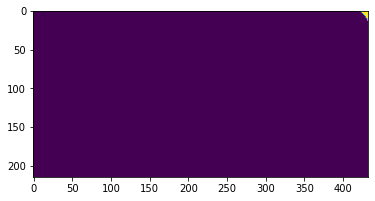

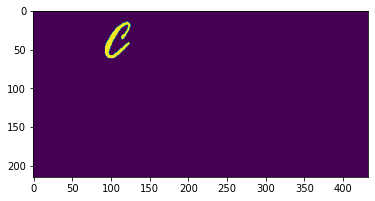

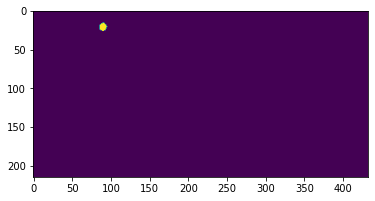

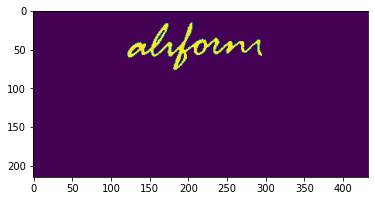

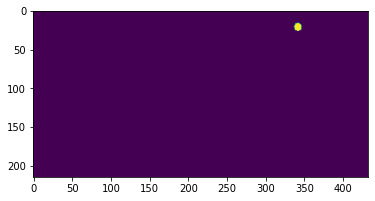

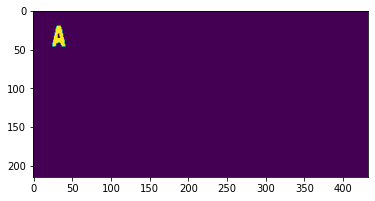

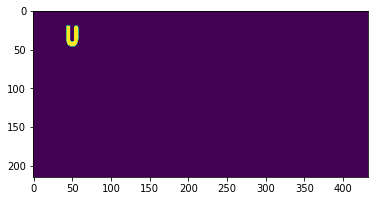

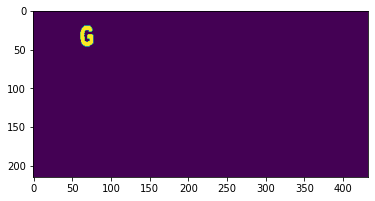

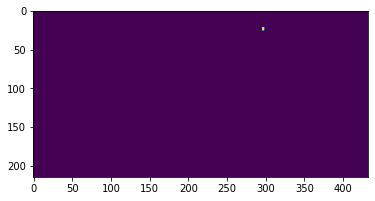

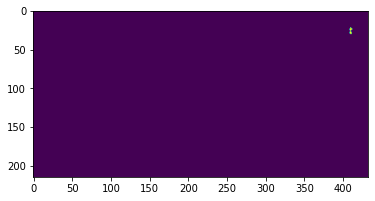

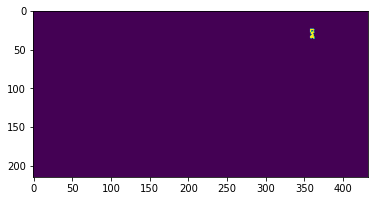

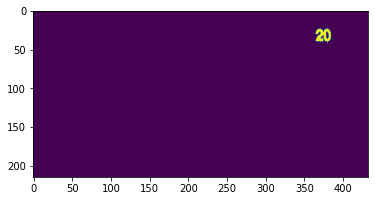

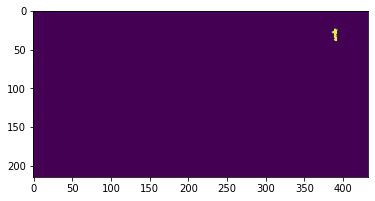

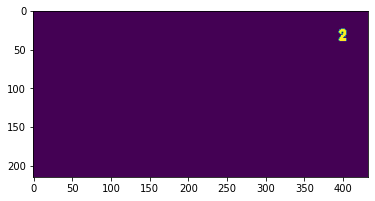

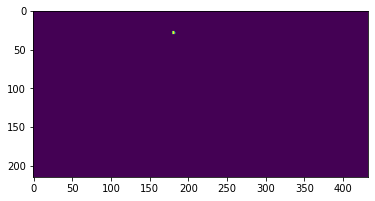

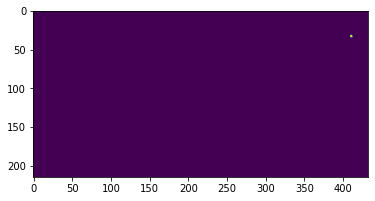

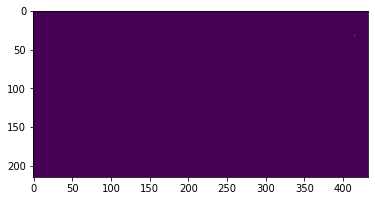

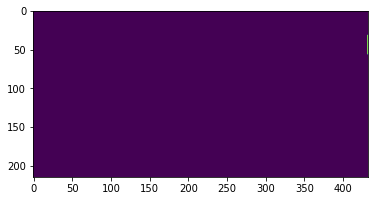

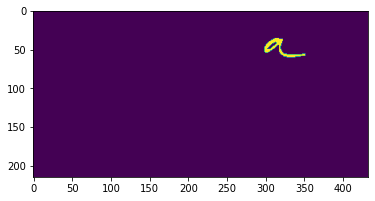

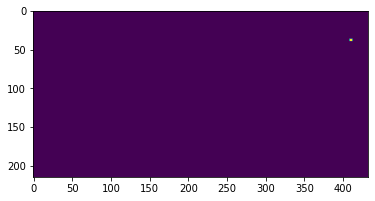

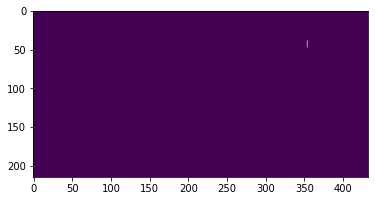

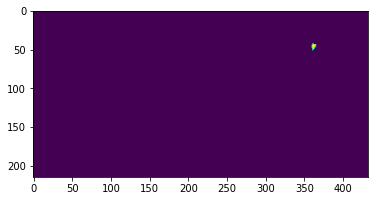

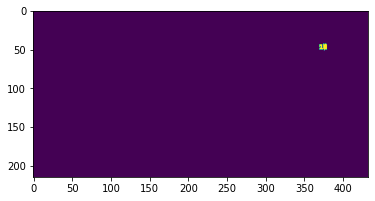

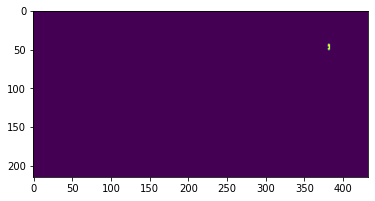

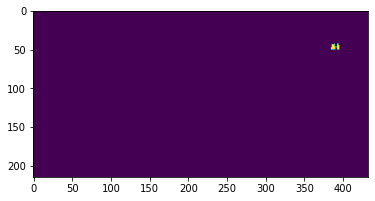

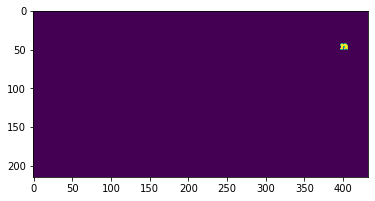

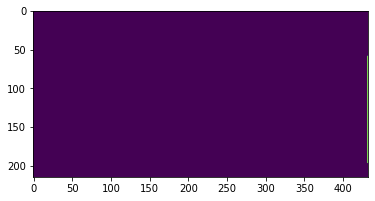

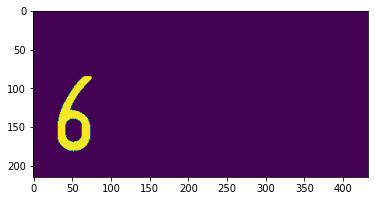

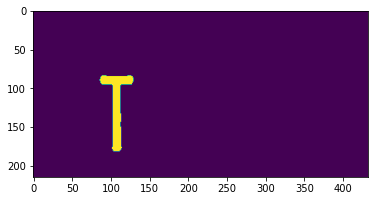

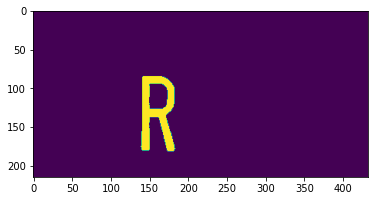

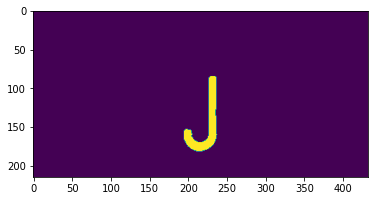

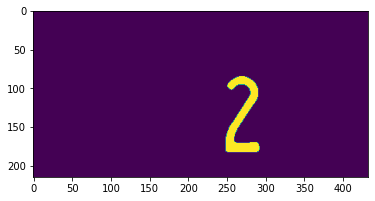

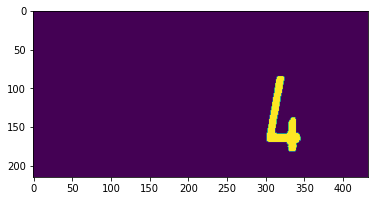

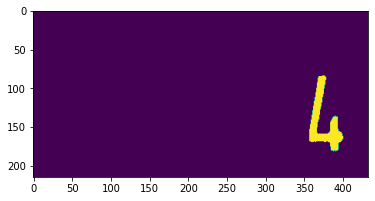

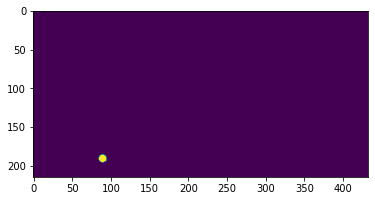

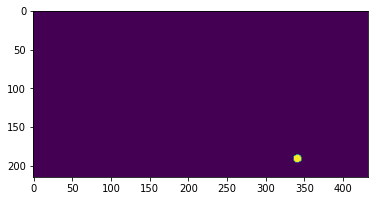

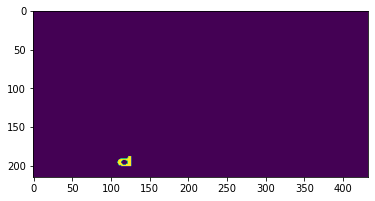

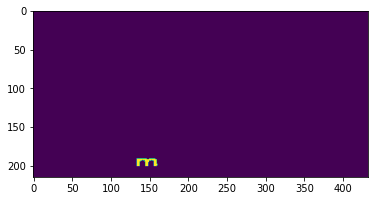

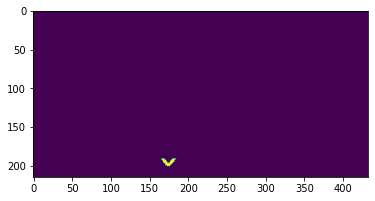

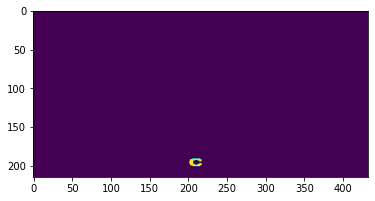

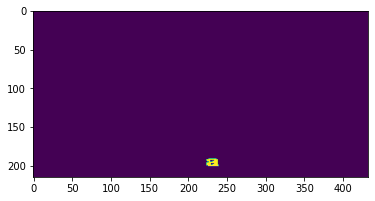

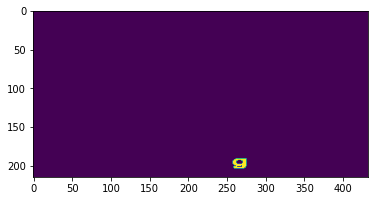

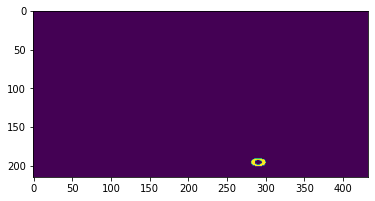

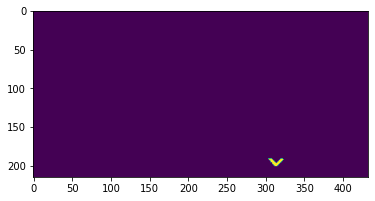

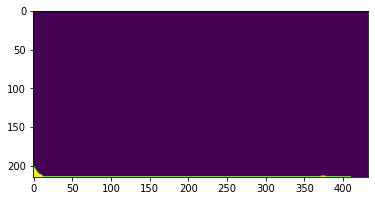

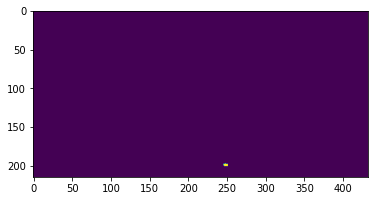

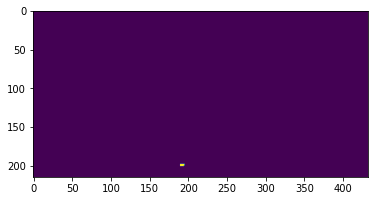

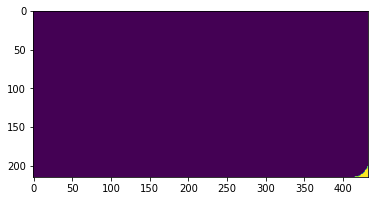

In [30]:

for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	# print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv.CC_STAT_LEFT]
	y = stats[i, cv.CC_STAT_TOP]
	w = stats[i, cv.CC_STAT_WIDTH]
	h = stats[i, cv.CC_STAT_HEIGHT]
	area = stats[i, cv.CC_STAT_AREA]
	(cX, cY) = centroids[i]
	img_ann = gray.copy()
	cv.rectangle(img_ann, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv.circle(img_ann, (int(cX), int(cY)), 4, (0, 0, 255), -1)
	componentMask = (labels == i).astype("uint8") * 255
	plt.figure()
	plt.imshow(img_ann,cmap="gray")
	plt.imshow(componentMask)

plt.show()